# Fully-connected networks

This notebook shows results equivalent to Fig. $2$, $3$, $4$, $5$ for fully-connected networks. All parameters are left unchanged apart from the parameters `batch_size` and `kernel_size`. The fully-connected behaviour is simply enforced by setting `kernel_size = 1`, which has the effect of flattening the original images and reducing the spatial extent to $n=1$.

For the experiments equivalent to Fig. $3$, $4$, $5$, the number of realizations is reduced to `num_realizations = 200` for reasons of computing time. This has the effect of making the curves slightly more noisy, but it is already enough to gain insights.

## Moments of vanilla nets

The results here are equivalent to the results of Fig. $2$ ,with the only difference that second-order moments of the noise diffuse faster. This means that the noise is not as well-conditioned as in the case of vanilla convolutional networks *(see the proof of Theorem $1$ in the paper)*.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
run_experiment(architecture='vanilla', total_depth=200, kernel_size=1, num_channels=128, 
               dataset='cifar10', # boundary conditions are not relevant for fully-connected networks
               batch_size=1024, num_realizations=10000, name_experiment='vanilla_histo_FC', 
               num_computations=4, # only compute 4 moments, at depth 50, 100, 150, 200
               compute_reff_signal=False, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla_histo', name_experiment='vanilla_histo_FC')

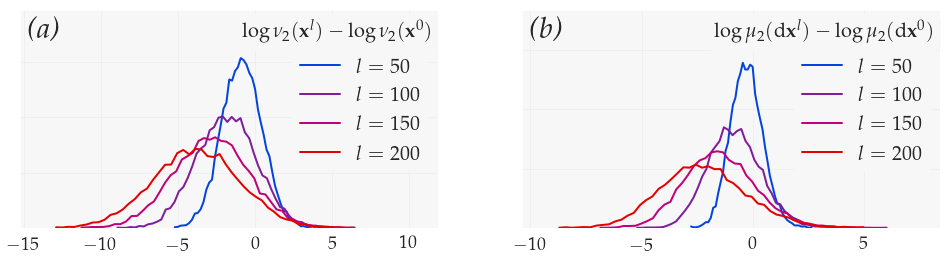

In [8]:
from manage_experiments import load_experiment
from plots import plot_vanilla_histo
%matplotlib inline

moments = load_experiment('vanilla_histo_FC')
plot_vanilla_histo(moments, use_tex=True, name_fig=None)

## Evolution of vanilla nets

The evolution of fully-connected vanilla nets is equivalent to the evolution of Fig. $3$, with the same convergence to $\delta \chi^l \to 1$ and to the pathology of one-dimensional signal: $r_\text{eff}(\mathbf{x}^l) \to 1$. 

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
run_experiment(architecture='vanilla', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=64, num_realizations=200, name_experiment='vanilla_FC', 
               compute_reff_signal=True, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla', name_experiment='vanilla_FC')

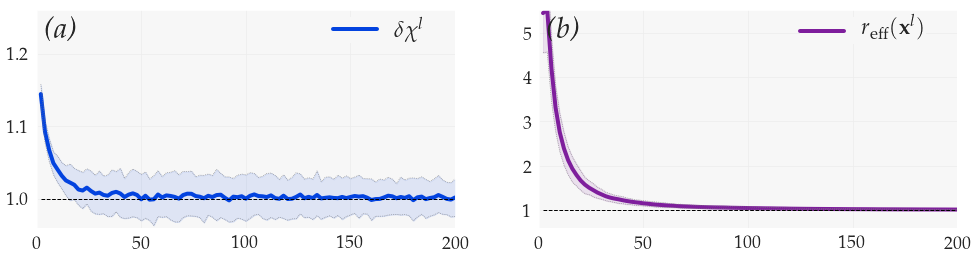

In [9]:
from manage_experiments import load_experiment
from plots import plot_vanilla
%matplotlib inline

moments_vanilla = load_experiment('vanilla_FC')
plot_vanilla(moments_vanilla, use_tex=True, name_fig=None)

## Evolution of batch-normalized feedforward nets

*As in Fig. $4$, batch-normalized fully-connected feedforward nets are subject to the pathology of exploding sensitivity. However, there is an earlier saturation of the pathologies in the signal, with a relatively large $r_\text{eff}(\mathbf{x}^l)$ and relatively low $\mu_4(\mathbf{z}^l)$.* 

This comes from the fact that rare events cannot be arbirtrary rare for a distribution comprised of a finite number of point masses: $\frac{1}{M} \sum^M_{i=1} \delta_{p_i}$. The paper shows in particular that the kurtosis, i.e. the fourth order standardized moment, of $M$ batch-normalized samples is roughly bounded by $M$. We illustrate this by running the same experiment with increasing values of `batch size` of $64$, $128$, $256$, $512$.

Small sample effects are much less pronouced for convolutional networks since different spatial positions $\alpha$ count as different samples. A batch of 64 images of size $16 \times 16$ for convolutional networks is equivalent to  a batch of $16,384$ samples for fully-connected networks.

Smaller batch sizes leads to larger effect of the nonlinearity: $\delta^{}_\phi \chi^l$, and smaller effect of batch normalization: $\delta^{}_\text{BN} \chi^l$. Interestingly, this also leads to the noise geting ill-conditioned with lower $r_\text{eff}(\mathbf{x}^l)$.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# these computations ran in the cloud, but they are left here to show the function calls
run_experiment(architecture='BN_FF', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=64, num_realizations=200, name_experiment='BN_FF_FC_64', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

run_experiment(architecture='BN_FF', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=128, num_realizations=200, name_experiment='BN_FF_FC_128', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

run_experiment(architecture='BN_FF', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=256, num_realizations=200, name_experiment='BN_FF_FC_256', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

run_experiment(architecture='BN_FF', total_depth=200, kernel_size=1, num_channels=512, 
               dataset='cifar10',  # boundary conditions are not relevant for fully-connected networks
               batch_size=512, num_realizations=200, name_experiment='BN_FF_FC_512', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='BN_FF', name_experiment='BN_FF_FC_64')
prune_experiment(type_plot='BN_FF', name_experiment='BN_FF_FC_128')
prune_experiment(type_plot='BN_FF', name_experiment='BN_FF_FC_256')
prune_experiment(type_plot='BN_FF', name_experiment='BN_FF_FC_512')

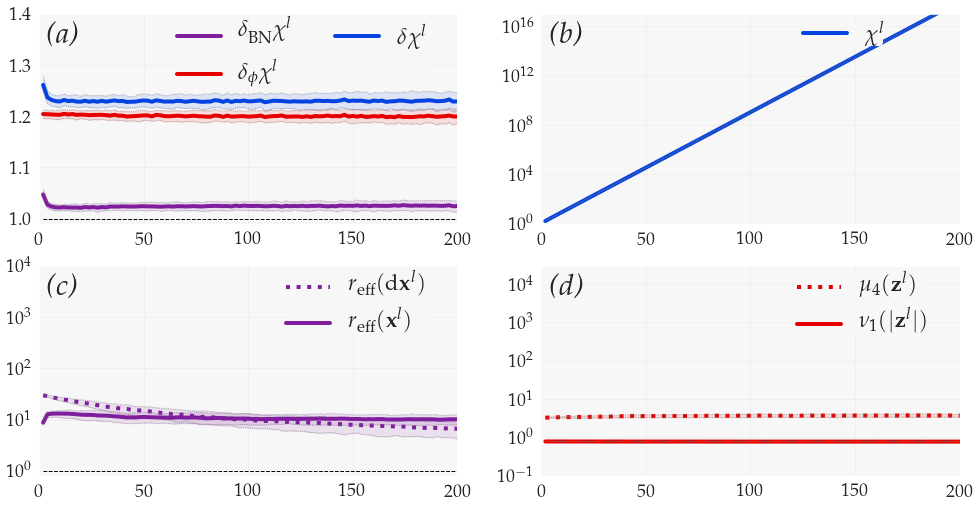

In [10]:
from manage_experiments import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_BN_FF = load_experiment('BN_FF_FC_64')
plot_BN_FF(moments_BN_FF, use_tex=True, name_fig=None)

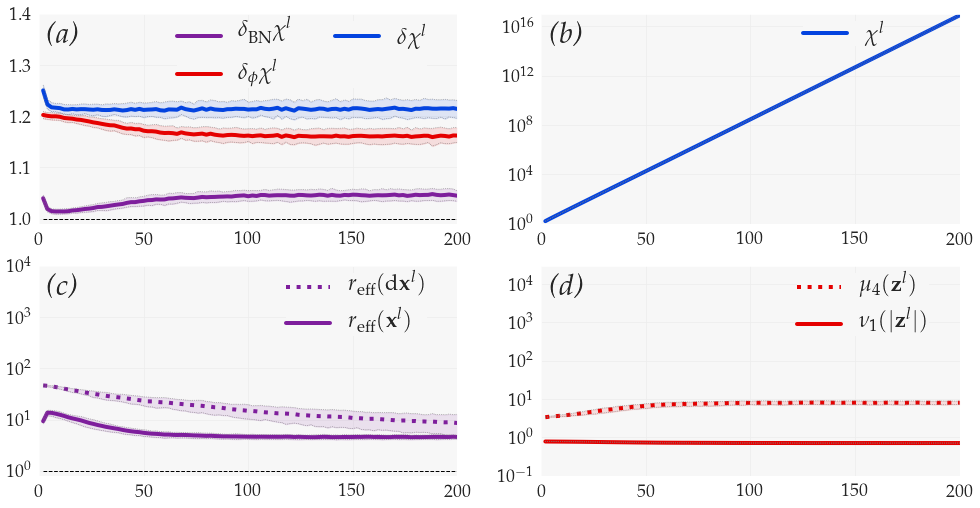

In [11]:
from manage_experiments import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_BN_FF = load_experiment('BN_FF_FC_128')
plot_BN_FF(moments_BN_FF, use_tex=True, name_fig=None)

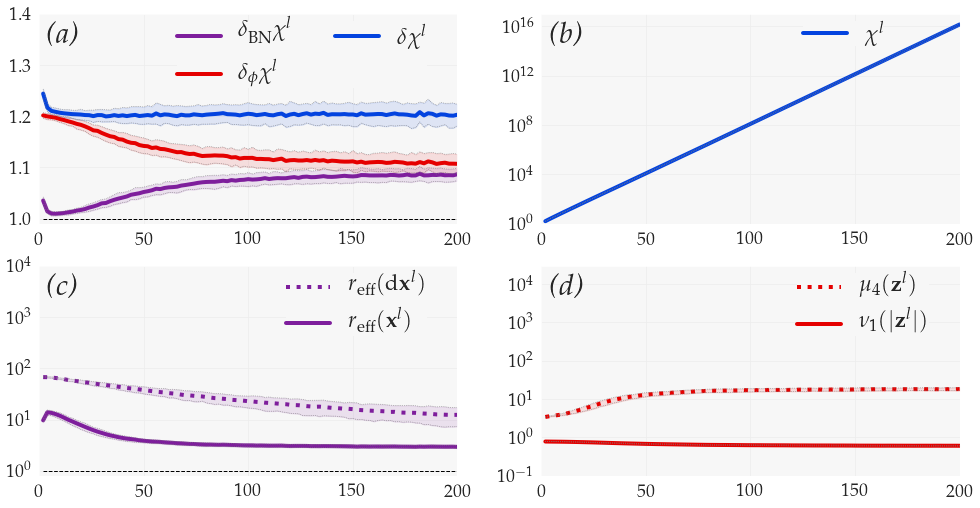

In [12]:
from manage_experiments import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_BN_FF = load_experiment('BN_FF_FC_256')
plot_BN_FF(moments_BN_FF, use_tex=True, name_fig=None)

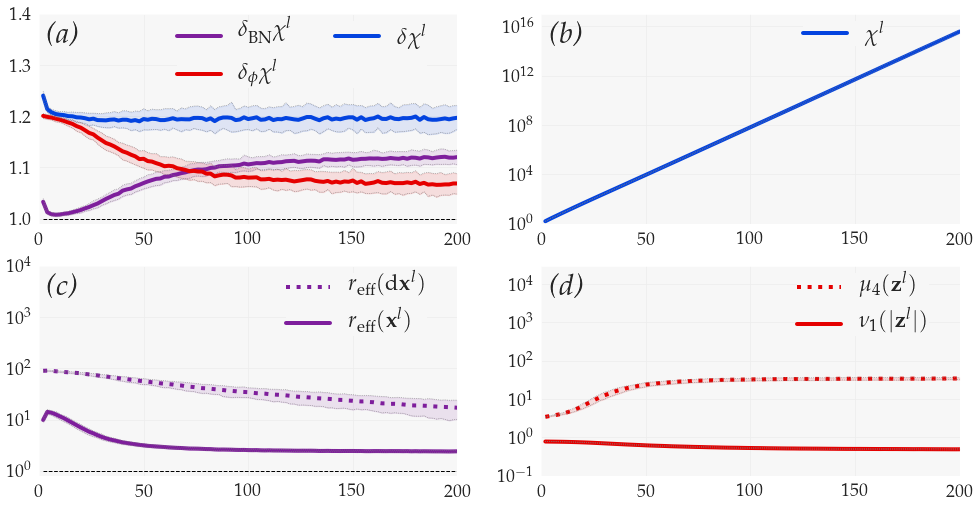

In [13]:
from manage_experiments import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_BN_FF = load_experiment('BN_FF_FC_512')
plot_BN_FF(moments_BN_FF, use_tex=True, name_fig=None)

## Evolution of batch-normalized resnets

*The evolution of batch-normalized resnets is again the slowed down version of the evolution of batch-normalized feedforward nets*, with perfect power-law fit of $\chi^l$ and subplots (a), (c), (d) very similar to the subplots (a), (c), (d) for batch-normalized feedforward nets.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
run_experiment(architecture='BN_Res', total_depth=500, kernel_size=1, num_channels=512, 
               dataset='cifar10', res_depth=2,  # boundary conditions are not relevant for fully-connected networks
               batch_size=64, num_realizations=200, name_experiment='BN_Res_FC', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='BN_Res', name_experiment='BN_Res_FC')

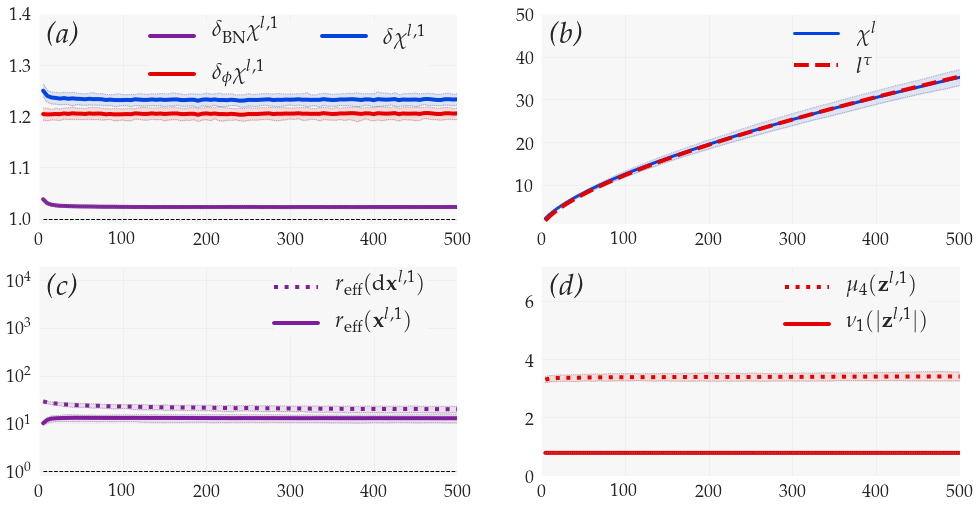

In [14]:
from manage_experiments import load_experiment
from plots import plot_BN_Res
%matplotlib inline

moments_BN_Res = load_experiment('BN_Res_FC')
plot_BN_Res(moments_BN_Res, use_tex=True , name_fig=None)